In [1]:
import sys
sys.path.insert(0, '../')

import rioxarray as rxr
import xarray as xr
import multidirectional_lee_filter as mlf
from matplotlib import pyplot as plt
import numpy as np

In [2]:
#Example image from Sentinel-1
im = rxr.open_rasterio('S1_example.tif')
im

<xarray.DataArray (band: 2, y: 1000, x: 2000)> Size: 32MB
[4000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 16B 1 2
  * x            (x) float64 16kB 4.275 4.275 4.275 4.275 ... 4.454 4.454 4.454
  * y            (y) float64 8kB 50.88 50.88 50.88 50.88 ... 50.79 50.79 50.79
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      ('VV', 'VH')

In [3]:
im_filtered = im.copy(deep=True)
for band_index in range(im_filtered.shape[0]):
    im_filtered.values[band_index] = mlf.multidirectional_lee_filter(im_filtered.values[band_index], 
                                                            win_size=7, 
                                                            noise_abs=None, 
                                                            noise_rel=1)
im_filtered.rio.to_raster('S1_example_filtered.tif')

Text(0.5, 1.0, 'filtered')

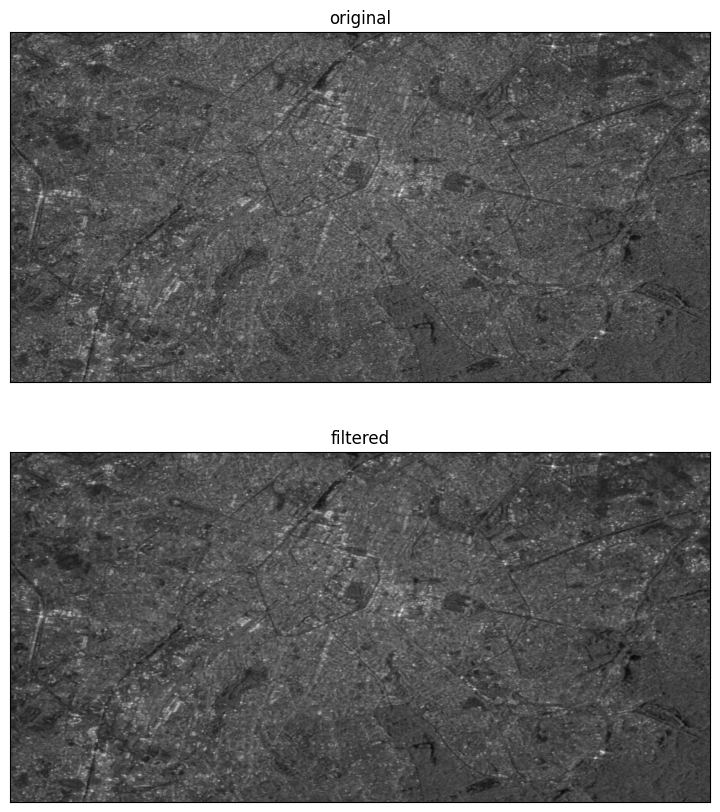

In [4]:
fig, axes=plt.subplots(2,1, figsize=(10,10))

axes[0].imshow(im.values[0], cmap='gist_yarg_r')
axes[1].imshow(im_filtered.values[0], cmap='gist_yarg_r')

for ax in axes.flatten():
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_xticks([])
axes[0].set_title('original')
axes[1].set_title('filtered')